In [43]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticks
import datetime as dt
import numpy as np

from matplotlib import dates as mdates

In [2]:
# import data into variables
def import_files():
    """Reads in .csv files from Data folder and names them
    dynamically with appropriate year"""
    
    # set file name template and years to use in file names
    file_name_template = "Chicago-Crime_{}"
    years = range(2001, 2023) # 2001-2022 (inclusive)
    
    # initialize dictionary to save files to
    data = {}
    
    # iterate through years
    for year in years:
        
        # recreate the file name
        file_name = file_name_template.format(year)
        
        # save file path based on file name
        file_path = f"Data/{file_name}.csv"
        
        # import as df
        df = pd.read_csv(file_path)
        
        # store in dictionary
        data[file_name] = df
        
        # replace dash (not allowed in python variable
        # names) with underscore
        # initialize new dictionary
        new_data = {}
            
        # loop through dict items
        for key, value in data.items():
            
            # if dash in key
            if "-" in key:
                
                # replace dash with underscore and save as new key
                new_key = key.replace("-", "_")
                
            # else new key is same as old key
            else:
                new_key = key
                
            # add new key with corresponding value to new dict
            new_data[new_key] = value
        
    # return dictionary
    return new_data

# call function and store in variable
imported_data = import_files()

# assign values to variables based on key names
for key, value in imported_data.items():
    globals()[key] = value
    
# check
display(Chicago_Crime_2001.head())
display(Chicago_Crime_2022.head())

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1311503,01/01/2001 01:00:00 AM,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER DANG WEAPON,BAR OR TAVERN,False,False,1933,19.0,NaN,41.931374,-87.648819
1,1311123,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1223,12.0,NaN,41.854014,-87.681909
2,3212105,01/01/2001 01:00:00 AM,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,True,False,913,9.0,14.0,41.823730,-87.698440
3,1584605,01/01/2001 01:00:00 AM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,1434,14.0,NaN,41.915639,-87.688701
4,1325760,01/01/2001 01:00:00 PM,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,GOVERNMENT BUILDING/PROPERTY,True,False,1033,10.0,NaN,NaN,NaN


,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,12581857,01/01/2022 01:00:00 AM,ASSAULT,SIMPLE,APARTMENT,True,True,2535,25.0,26.0,41.908835,-87.725271
1,12592889,01/01/2022 01:00:00 AM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,False,412,4.0,8.0,41.734353,-87.585147
2,12636759,01/01/2022 01:00:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,STREET,False,False,2523,25.0,30.0,41.934060,-87.722143
3,12607191,01/01/2022 01:00:00 PM,DECEPTIVE PRACTICE,FORGERY,APARTMENT,False,False,2432,24.0,40.0,42.000819,-87.670466
4,12582293,01/01/2022 01:00:00 PM,THEFT,$500 AND UNDER,RESTAURANT,False,False,121,1.0,42.0,41.881884,-87.640060


In [3]:
# put all dfs into list for concatenation
df_list = [globals()[name] for name in imported_data.keys() if isinstance(globals()[name], pd.DataFrame)]

# check
len(df_list)

22

In [4]:
# concatenate
df = pd.concat(df_list)

# check
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7712649 entries, 0 to 238759
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 662.0+ MB


,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1311503,01/01/2001 01:00:00 AM,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER DANG WEAPON,BAR OR TAVERN,False,False,1933,19.0,NaN,41.931374,-87.648819
1,1311123,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1223,12.0,NaN,41.854014,-87.681909
2,3212105,01/01/2001 01:00:00 AM,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,True,False,913,9.0,14.0,41.823730,-87.698440
3,1584605,01/01/2001 01:00:00 AM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,1434,14.0,NaN,41.915639,-87.688701
4,1325760,01/01/2001 01:00:00 PM,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,GOVERNMENT BUILDING/PROPERTY,True,False,1033,10.0,NaN,NaN,NaN


In [5]:
# check for null values
df.isna().sum()

ID                           0
Date                         0
Primary Type                 0
Description                  0
Location Description     10221
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614846
Latitude                 87598
Longitude                87598
dtype: int64

In [6]:
# convert 'Date' column (now object) to datetime data type
df['Date'] = pd.to_datetime(df['Date'],
                           format = '%m/%d/%Y %I:%M:%S %p')

# check
df['Date']

0        2001-01-01 01:00:00
1        2001-01-01 01:00:00
2        2001-01-01 01:00:00
3        2001-01-01 01:00:00
4        2001-01-01 13:00:00
                 ...        
238755   2022-12-31 12:50:00
238756   2022-12-31 12:50:00
238757   2022-12-31 12:52:00
238758   2022-12-31 00:52:00
238759   2022-12-31 12:59:00
Name: Date, Length: 7712649, dtype: datetime64[ns]

In [7]:
# set the datetime column as the index
df_ts = df.set_index('Date')

# check
df_ts

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01 01:00:00,1311503,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER DANG WEAPON,BAR OR TAVERN,False,False,1933,19.0,NaN,41.931374,-87.648819
2001-01-01 01:00:00,1311123,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1223,12.0,NaN,41.854014,-87.681909
2001-01-01 01:00:00,3212105,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,True,False,913,9.0,14.0,41.823730,-87.698440
2001-01-01 01:00:00,1584605,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,1434,14.0,NaN,41.915639,-87.688701
2001-01-01 13:00:00,1325760,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,GOVERNMENT BUILDING/PROPERTY,True,False,1033,10.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 12:50:00,12938029,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966
2022-12-31 12:50:00,12937822,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669
2022-12-31 12:52:00,12938420,ASSAULT,SIMPLE,COMMERCIAL / BUSINESS OFFICE,False,False,1432,14.0,32.0,41.930693,-87.685657


In [8]:
# alternate code:
resampled_df = df_ts.copy()
# add 'Count' column with 1 for each row
resampled_df['Count'] = 1
# resample and count with .sum()
resampled_df = resampled_df.resample('D').sum(numeric_only = True)

# check
resampled_df.head()

,ID,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Count
Date,,,,,,,,,
2001-01-01,4011740634,400,289,2267987,21147.0,8194.0,72641.077994,-152199.715024,1825
2001-01-02,1545846568,383,146,1404493,12797.0,147.0,47664.670569,-99856.853277,1143
2001-01-03,1542074517,343,162,1462886,13359.0,132.0,48045.805839,-100651.350927,1151
2001-01-04,1555657957,377,131,1397040,12994.0,0.0,48785.523718,-102222.916683,1166
2001-01-05,1701884634,415,159,1530155,14044.0,156.0,52769.463977,-110554.590960,1267


We now have two dataframes, df_ts and resampled_df, to use to answer the questions below.

    - df_ts: each row is one crime
    - resampled_df: each row is one day, and the number of crimes on that day appears in the 'Count' column

## Topic 1) Comparing Police Districts:


### Which district has the most crimes?

In [9]:
# look at a list of all the districts
print(df_ts['District'].nunique())
print(df_ts['District'].unique())

24
[19. 12.  9. 14. 10.  8. 15. 16.  2.  3.  6. 17. 11. 22.  5.  7. 18.  4.
 24. 25. 20.  1. 31. 21. nan]


There are 24 districts represented in the data but the highest district number is 31. This means we are missing some districts in the data or some district numbers don't exist. This should be investigated further in a real-world scenario. For now, we will move on.

In [10]:
# convert float district numbers to integers
df_ts['District'] = df_ts['District'].astype('Int64')

# check
df_ts['District']

Date
2001-01-01 01:00:00    19
2001-01-01 01:00:00    12
2001-01-01 01:00:00     9
2001-01-01 01:00:00    14
2001-01-01 13:00:00    10
                       ..
2022-12-31 12:50:00    10
2022-12-31 12:50:00     7
2022-12-31 12:52:00    14
2022-12-31 00:52:00    11
2022-12-31 12:59:00    15
Name: District, Length: 7712649, dtype: Int64

In [11]:
# crime count per district with .value_counts()
df_ts['District'].value_counts(dropna = False)

8       518501
11      495909
6       450629
7       447253
25      439127
4       437726
3       391040
12      381218
9       377292
2       364705
19      345915
18      345648
5       342091
10      332378
15      331455
1       310764
14      298782
16      257925
22      252712
24      232686
17      222502
20      136104
31         236
<NA>        47
21           4
Name: District, dtype: Int64

In [12]:
# percentage
df_ts['District'].value_counts(dropna = False,
                              normalize = True)

8       0.067227
11      0.064298
6       0.058427
7        0.05799
25      0.056936
4       0.056754
3       0.050701
12      0.049428
9       0.048919
2       0.047287
19       0.04485
18      0.044816
5       0.044355
10      0.043095
15      0.042976
1       0.040293
14      0.038739
16      0.033442
22      0.032766
24      0.030169
17      0.028849
20      0.017647
31      0.000031
<NA>    0.000006
21      0.000001
Name: District, dtype: Float64

District 8 has the most crimes of all the districts, with about 6.7% of all crimes reported there.

### Which district has the least crimes? 

District 21 has the least crimes of all the districts, with only 4 crimes reported there (out of a total of 120,604 reported crimes total).

# Visualization

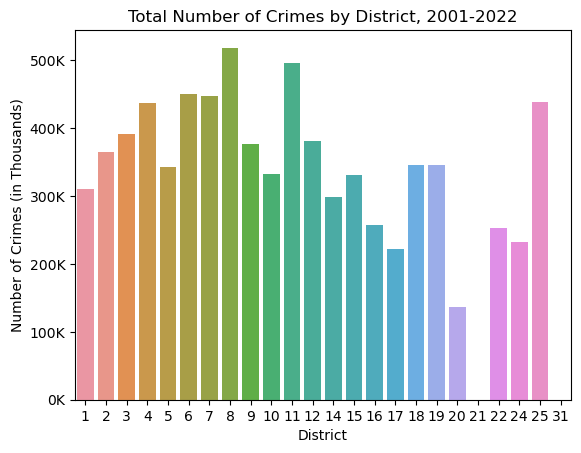

In [13]:
# function to format y-axis units
def thousands(x, pos):
    """formats money in thousands"""
    new_x = x / 1000
    return f"{new_x:,.0f}K"

# set data
plot_series = df_ts['District'].value_counts(dropna = True)

# sns.barplot
ax = sns.barplot(x = plot_series.index,
                y = plot_series.values)

# create string format for y-axis units
fmt_thous = mticks.FuncFormatter(thousands)

# set y-axis major formatter
ax.yaxis.set_major_formatter(fmt_thous)

# set title and axes
ax.set_title('Total Number of Crimes by District, 2001-2022')
ax.set_ylabel('Number of Crimes (in Thousands)')
ax.set_xlabel('District')

# show
plt.show();

# Topic 2) Crimes Across the Years

### Is the total number of crimes increasing or decreasing across the years?

In [14]:
# resample df_ts by year
years_ts = df_ts.resample('Y').size()

# check
years_ts

Date
2001-12-31    485886
2002-12-31    486807
2003-12-31    475984
2004-12-31    469421
2005-12-31    453772
2006-12-31    448179
2007-12-31    437087
2008-12-31    427169
2009-12-31    392825
2010-12-31    370505
2011-12-31    351977
2012-12-31    336275
2013-12-31    307479
2014-12-31    275750
2015-12-31    264780
2016-12-31    269816
2017-12-31    269100
2018-12-31    268820
2019-12-31    261296
2020-12-31    212185
2021-12-31    208776
2022-12-31    238760
Freq: A-DEC, dtype: int64

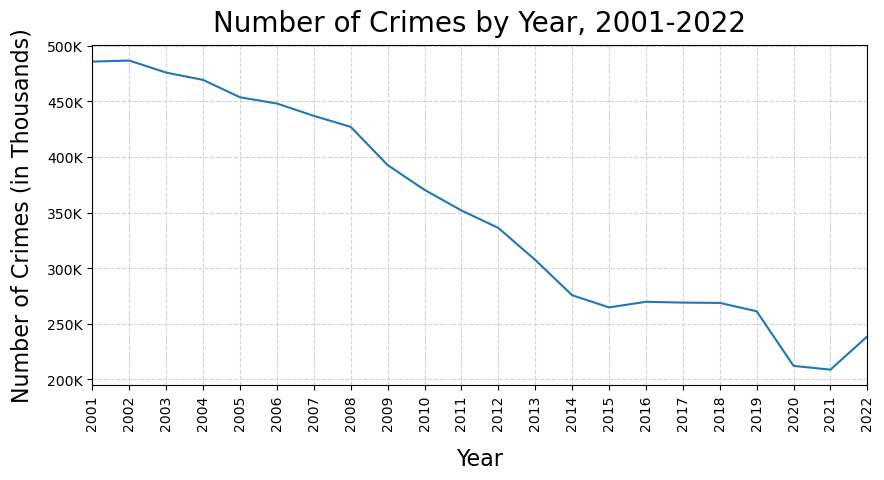

In [15]:
# set subplots
fig, ax = plt.subplots(figsize = (10, 5))

# Y-AXIS FORMATTING
# function to format y-axis units
def thousands(x, pos):
    """formats money in thousands"""
    new_x = x / 1000
    return f"{new_x:,.0f}K"
# create string format for y-axis units
fmt_thous = mticks.FuncFormatter(thousands)
# set y-axis major formatter
ax.yaxis.set_major_formatter(fmt_thous)

# X-AXIS FORMATTING
# one tick every year
major_ticks_loc = mdates.YearLocator(1)
# 4-digit-year labels
major_ticks_format = mdates.DateFormatter('%Y')
# set locator and formatter
ax.xaxis.set_major_locator(major_ticks_loc)
ax.xaxis.set_major_formatter(major_ticks_format)

# plot
years_ts.plot(ax = ax)

# set title and axes labels
ax.set_title('Number of Crimes by Year, 2001-2022',
            fontsize = 20,
            pad = 10)
ax.set_ylabel('Number of Crimes (in Thousands)',
             fontsize = 16,
             labelpad = 10)
ax.set_xlabel('Year',
             fontsize = 16,
             labelpad = 12)
# rotate major tick labels on x-axis 90 degrees
fig.autofmt_xdate(which = 'major',
                 rotation = 90)

# make year labels on major ticks on x-axis centered
for label in ax.xaxis.get_majorticklabels():
    label.set_horizontalalignment('center')
    
# make year label show up on every major tick
years = pd.date_range(start = '2001', end = '2022', freq = 'AS')
plt.xticks(years, [year.year for year in years])

# add grid
ax.grid(color='lightgray', linestyle='--');


The total number of crimes has been decreasing across the years. We see that 2023 has the lowest number of crimes since 2001, but we don't have all the data for 2023 yet.

### Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

In [16]:
# look at 'Primary Type' column from original df
df_ts['Primary Type'].value_counts()

THEFT                                1626974
BATTERY                              1410868
CRIMINAL DAMAGE                       878912
NARCOTICS                             746149
ASSAULT                               501100
OTHER OFFENSE                         479028
BURGLARY                              422246
MOTOR VEHICLE THEFT                   366583
DECEPTIVE PRACTICE                    340844
ROBBERY                               289675
CRIMINAL TRESPASS                     212867
WEAPONS VIOLATION                     103905
PROSTITUTION                           69750
OFFENSE INVOLVING CHILDREN             55249
PUBLIC PEACE VIOLATION                 52086
SEX OFFENSE                            30347
CRIM SEXUAL ASSAULT                    27601
INTERFERENCE WITH PUBLIC OFFICER       18206
LIQUOR LAW VIOLATION                   14846
GAMBLING                               14616
ARSON                                  13122
HOMICIDE                               12394
KIDNAPPING

To clean up the data a bit, I will combine the following:

- 'CRIM SEXUAL ASSAULT' and 'CRIMINAL SEXUAL ASSAULT' (as 'CRIMINAL SEXUAL ASSAULT')
- 'NON-CRIMINAL' and 'NON - CRIMINAL' and 'NON-CRIMINAL (SUBJECT SPECIFIED' (as 'NON-CRIMINAL')
- 'NARCOTICS' and 'OTHER NARCOTIC VIOLATION' (as 'NARCOTICS')

In [17]:
# clean up 'Primary Type' groupings
df_ts['Primary Type'] = df_ts['Primary Type'].replace({'CRIM SEXUAL ASSAULT': 'CRIMINAL SEXUAL ASSAULT',
                                                      'NON - CRIMINAL': 'NON-CRIMINAL',
                                                      'NON-CRIMINAL (SUBJECT SPECIFIED)': 'NON-CRIMINAL',
                                                      'OTHER NARCOTIC VIOLATION': 'NARCOTICS'})

# check
df_ts['Primary Type'].value_counts()

THEFT                                1626974
BATTERY                              1410868
CRIMINAL DAMAGE                       878912
NARCOTICS                             746296
ASSAULT                               501100
OTHER OFFENSE                         479028
BURGLARY                              422246
MOTOR VEHICLE THEFT                   366583
DECEPTIVE PRACTICE                    340844
ROBBERY                               289675
CRIMINAL TRESPASS                     212867
WEAPONS VIOLATION                     103905
PROSTITUTION                           69750
OFFENSE INVOLVING CHILDREN             55249
PUBLIC PEACE VIOLATION                 52086
CRIMINAL SEXUAL ASSAULT                33927
SEX OFFENSE                            30347
INTERFERENCE WITH PUBLIC OFFICER       18206
LIQUOR LAW VIOLATION                   14846
GAMBLING                               14616
ARSON                                  13122
HOMICIDE                               12394
KIDNAPPING

In [18]:

# check as percentages
df_ts['Primary Type'].value_counts(normalize = True)

THEFT                                2.109488e-01
BATTERY                              1.829291e-01
CRIMINAL DAMAGE                      1.139572e-01
NARCOTICS                            9.676260e-02
ASSAULT                              6.497119e-02
OTHER OFFENSE                        6.210940e-02
BURGLARY                             5.474721e-02
MOTOR VEHICLE THEFT                  4.753010e-02
DECEPTIVE PRACTICE                   4.419286e-02
ROBBERY                              3.755843e-02
CRIMINAL TRESPASS                    2.759973e-02
WEAPONS VIOLATION                    1.347202e-02
PROSTITUTION                         9.043585e-03
OFFENSE INVOLVING CHILDREN           7.163427e-03
PUBLIC PEACE VIOLATION               6.753322e-03
CRIMINAL SEXUAL ASSAULT              4.398878e-03
SEX OFFENSE                          3.934705e-03
INTERFERENCE WITH PUBLIC OFFICER     2.360538e-03
LIQUOR LAW VIOLATION                 1.924890e-03
GAMBLING                             1.895069e-03


I will combine all crimes with a Primary Type less than 1% of the overall crimes number with 'OTHER OFFENSE' to make the plot look cleaner and easier to read.

In [19]:
# specify crimes that count for less than 1%
to_replace = ['PROSTITUTION',
             'OFFENSE INVOLVING CHILDREN',
             'PUBLIC PEACE VIOLATION',
             'CRIMINAL SEXUAL ASSAULT',
             'SEX OFFENSE',
             'INTERFERENCE WITH PUBLIC OFFICER',
             'LIQUOR LAW VIOLATION',
             'GAMBLING',
             'ARSON',
             'HOMICIDE',
             'KIDNAPPING',
             'STALKING',
             'INTIMIDATION',
             'CONCEALED CARRY LICENSE VIOLATION',
             'OBSCENITY',
             'NON-CRIMINAL',
             'PUBLIC INDECENCY',
             'HUMAN TRAFFICKING',
             'RITUALISM',
             'DOMESTIC VIOLENCE']

# replace with 'OTHER OFFENSE'
df_ts['Primary Type'] = df_ts['Primary Type'].replace(to_replace, 'OTHER OFFENSE')

# check
df_ts['Primary Type'].value_counts()

THEFT                  1626974
BATTERY                1410868
CRIMINAL DAMAGE         878912
OTHER OFFENSE           812379
NARCOTICS               746296
ASSAULT                 501100
BURGLARY                422246
MOTOR VEHICLE THEFT     366583
DECEPTIVE PRACTICE      340844
ROBBERY                 289675
CRIMINAL TRESPASS       212867
WEAPONS VIOLATION       103905
Name: Primary Type, dtype: int64

In [20]:
# check with percentages
df_ts['Primary Type'].value_counts(normalize = True)

THEFT                  0.210949
BATTERY                0.182929
CRIMINAL DAMAGE        0.113957
OTHER OFFENSE          0.105331
NARCOTICS              0.096763
ASSAULT                0.064971
BURGLARY               0.054747
MOTOR VEHICLE THEFT    0.047530
DECEPTIVE PRACTICE     0.044193
ROBBERY                0.037558
CRIMINAL TRESPASS      0.027600
WEAPONS VIOLATION      0.013472
Name: Primary Type, dtype: float64

In [21]:
# make a copy
primarytype_ts = df_ts.copy()

# put a '1' in each row
primarytype_ts['Count'] = 1

# group crimes by 'Primary Type' and resample by year
primarytype_ts = primarytype_ts.groupby('Primary Type').resample('Y').sum(numeric_only = True)

# drop unnecessary columns
primarytype_ts = primarytype_ts.drop(columns = ['ID',
                                               'Arrest',
                                               'Domestic',
                                               'Beat',
                                               'District',
                                               'Ward',
                                               'Latitude',
                                               'Longitude'])

# check
primarytype_ts

Count
Primary Type      Date             
ASSAULT           2001-12-31  31384
                  2002-12-31  31523
                  2003-12-31  29477
                  2004-12-31  28850
                  2005-12-31  27067
...                             ...
WEAPONS VIOLATION 2018-12-31   5456
                  2019-12-31   6339
                  2020-12-31   8432
                  2021-12-31   8980
                  2022-12-31   8766

[264 rows x 1 columns]

In [22]:
# use unstack to get plot with different lines for
# different primary types
unstacked = primarytype_ts.unstack(level = 0)

# check
unstacked

Count                                                     \
Primary Type ASSAULT BATTERY BURGLARY CRIMINAL DAMAGE CRIMINAL TRESPASS   
Date                                                                      
2001-12-31     31384   93461    26014           55859             13241   
2002-12-31     31523   94153    25623           55941             13880   
2003-12-31     29477   88380    25157           55011             14807   
2004-12-31     28850   87136    24564           53164             15913   
2005-12-31     27067   83964    25503           54548             16655   
2006-12-31     25945   80666    24324           57124             14505   
2007-12-31     26313   79593    24858           53749             13699   
2008-12-31     25449   75926    26218           52842             12310   
2009-12-31     22861   68460    26767           47724             10851   
2010-12-31     21537   65401    26422           40653              9401   
2011-12-31     20411   60459    26620           37332              8659   
2012-12-31     19900   59134    22845           35855              8216   
2013-12-31     17972   54006    17895           30855              8136   
2014-12-31     16903   49452    14569           27798              7539   
2015-12-31     17048   48923    13184           28677              6401   
2016-12-31     18742   50299    14289           31018              6306   
2017-12-31     19306   49239    13001           29045              6814   
2018-12-31     20406   49828    11747           27824              6909   
2019-12-31     20620   49517     9638           26681              6818   
2020-12-31     18254   41512     8757           24878              4177   
2021-12-31     20342   40460     6659           25094              3406   
2022-12-31     20790   40899     7592           27240              4224   

                                                                             \
Primary Type DECEPTIVE PRACTICE MOTOR VEHICLE THEFT NARCOTICS OTHER OFFENSE   
Date                                                                          
2001-12-31                14949               27553     50573         50857   
2002-12-31                13732               25121     51794         53904   
2003-12-31                13459               22748     54290         52236   
2004-12-31                13255               22805     57069         50926   
2005-12-31                13590               22497     56243         47868   
2006-12-31                13606               21818     55822         48340   
2007-12-31                14170               18573     54466         47506   
2008-12-31                14932               18881     46519         45077   
2009-12-31                13876               15482     43549         42141   
2010-12-31                12574               19029     43400         37353   
2011-12-31                12726               19388     38610         34757   
2012-12-31                13764               16492     35495         31717   
2013-12-31                13914               12582     34132         31388   
2014-12-31                15954                9911     29128         30015   
2015-12-31                16439               10068     23944         29744   
2016-12-31                19340               11286     13337         28168   
2017-12-31                19674               11380     11694         27996   
2018-12-31                19831                9985     13591         28277   
2019-12-31                19035                8977     15080         28106   
2020-12-31                18297                9959      7498         21245   
2021-12-31                17363               10602      5339         21816   
2022-12-31                16364               21446      4723         22942   

                                               
Primary Type ROBBERY  THEFT WEAPONS VIOLATION  
Date                                           
2001-12-31     1844

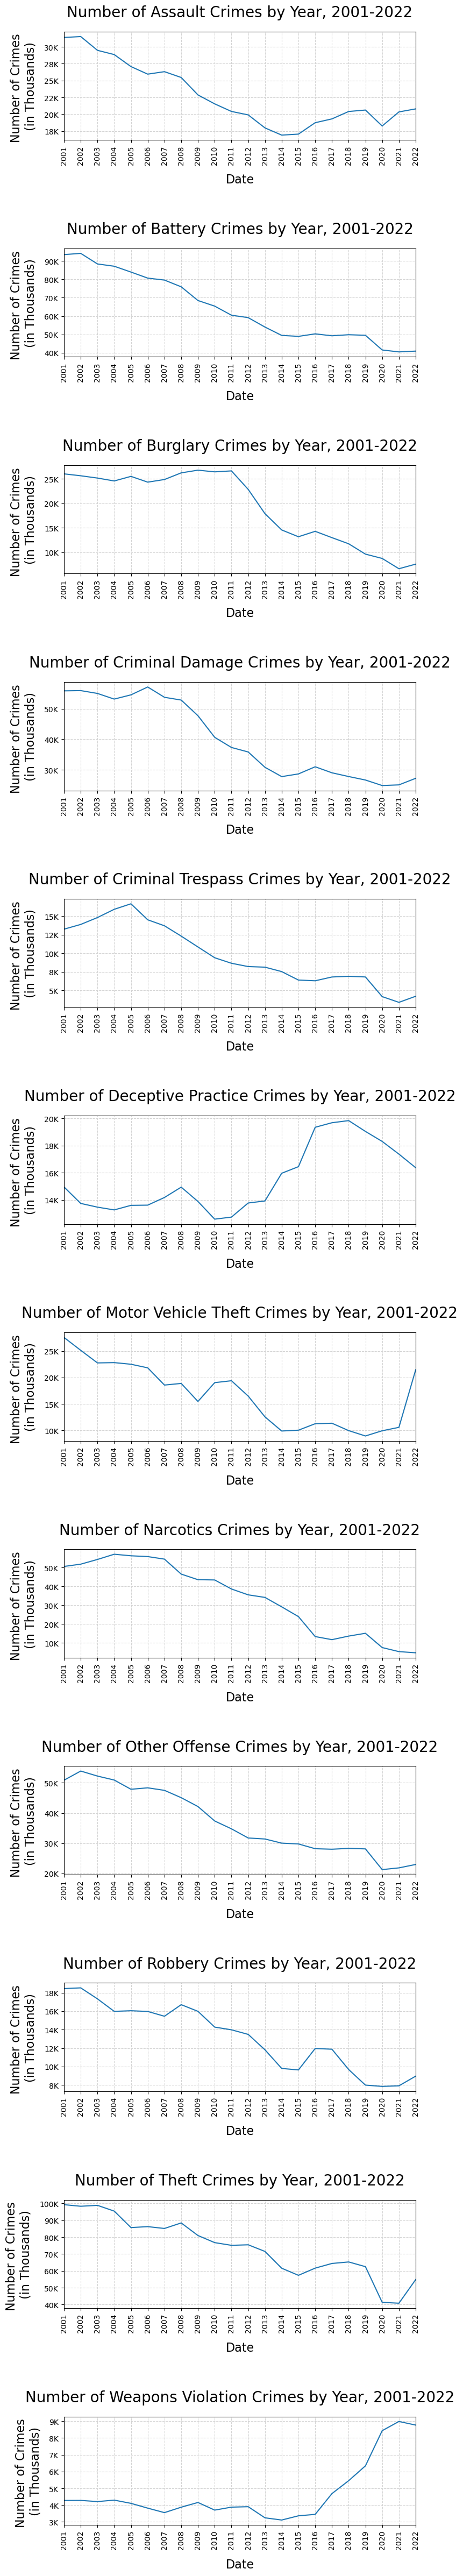

In [23]:
# plot each 'Primary Type' separately
# (plotting together is too busy; can't see
# trends of some of the lines)

# function to format y-axis units
def thousands(x, pos):
    """formats money in thousands"""
    new_x = x / 1000
    return f"{new_x:,.0f}K"

# subplots
fig, axes = plt.subplots(len(unstacked.columns),
                        1,
                        figsize = (8, 4 * len(unstacked.columns)),
                        sharex = False)

# loop through each column and plot
for i, column in enumerate(unstacked.columns):
    ax = axes[i]
    
    # Y-AXIS FORMATTING
    # create string format for y-axis units
    fmt_thous = mticks.FuncFormatter(thousands)
    # set y-axis major formatter
    ax.yaxis.set_major_formatter(fmt_thous)

    # X-AXIS FORMATTING
    # one tick every year
    major_ticks_loc = mdates.YearLocator(1)
    # 4-digit-year labels
    major_ticks_format = mdates.DateFormatter('%Y')
    # set locator and formatter
    ax.xaxis.set_major_locator(major_ticks_loc)
    ax.xaxis.set_major_formatter(major_ticks_format)

    # set title and axes
    ax.set_title(f'Number of {column[1].title()} Crimes by Year, 2001-2022',
                fontsize = 20,
                pad = 20)
    ax.set_ylabel('Number of Crimes \n(in Thousands)',
                 fontsize = 16,
                 labelpad = 10)
    ax.set_xlabel('Year',
                 fontsize = 16,
                 labelpad = 12)

    # plot
    unstacked[column].plot(ax = ax)
    
    # rotate x-axis tick labels
    ax.tick_params(axis = 'x', rotation = 90)

    # make year labels on major ticks on x-axis centered
    for label in ax.xaxis.get_majorticklabels():
        label.set_horizontalalignment('center')
        
    # make year label show up on every major tick
    years = pd.date_range(start = '2001', end = '2022', freq = 'AS')
    ax.set_xticks(years)
    ax.set_xticklabels([year.year for year in years])

    
    # add grid
    ax.grid(color='lightgray', linestyle='--')

# plot adjust layout
plt.tight_layout()
plt.subplots_adjust(hspace = 1)
    
# show
plt.show();

Yes, there are several types of crimes that show a dissimilar trend to the overall decrease in crimes from 2001-2022.

The primary types of crime that show the most different trends are:

- Deceptive Practice Crimes: risen overall since 2001, although has been on slight downward trajectory since 2018
- Motor Vehicle Theft: overall downward trend since 2001 but 2022 saw severe upward spike
- Weapons Violation: relative plateau from 2001 to 2016, and has sharply risen since

Some other primary types of crimes show interesting aspects, but still have a downward trend since 2001:

- Assault: downward trend over all 23 years but rising slightly since 2014
- Burglary: downward trend since 2011
- Criminal Damage Crimes: downward trend over all 23 years but has plateaued since 2014
- Criminal Trespass: downward trend since 2005

# Topic 4) Comparing Months:

### What months have the most crime? What months have the least?

In [24]:
# copy original data
months_df = df.copy()

# slice out the month
months_df['Month'] = months_df['Date'].dt.month_name()

# check
months_df['Month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [25]:
# get data for plotting
plot_series = months_df['Month'].value_counts(dropna = False)

# check
plot_series

July         717194
August       710395
May          682898
June         681718
October      676234
September    668209
March        629669
April        627153
November     608925
January      601177
December     579716
February     529361
Name: Month, dtype: int64

In [26]:
# re-order the months to be in calendar year order
desired_order = ['January',
                'February',
                'March',
                'April',
                'May',
                'June',
                'July',
                'August',
                'September',
                'October',
                'November',
                'December']

plot_series = plot_series.reindex(desired_order)

# check
plot_series

January      601177
February     529361
March        629669
April        627153
May          682898
June         681718
July         717194
August       710395
September    668209
October      676234
November     608925
December     579716
Name: Month, dtype: int64

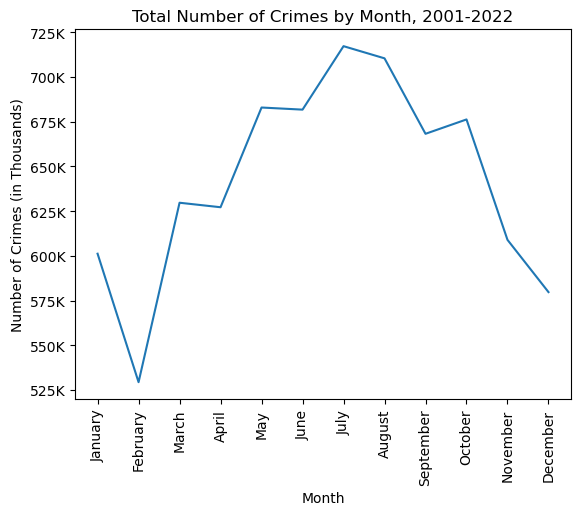

In [27]:
# function to format y-axis units
def thousands(x, pos):
    """formats money in thousands"""
    new_x = x / 1000
    return f"{new_x:,.0f}K"

# sns.barplot
ax = sns.lineplot(x = plot_series.index,
                y = plot_series.values)

# create string format for y-axis units
fmt_thous = mticks.FuncFormatter(thousands)

# set y-axis major formatter
ax.yaxis.set_major_formatter(fmt_thous)

# set title and axes
ax.set_title('Total Number of Crimes by Month, 2001-2022')
ax.set_ylabel('Number of Crimes (in Thousands)')
ax.set_xlabel('Month')

# rotate x-ticks
plt.xticks(rotation = 90, ha = 'center')

# show
plt.show();

The top two months with the most total crimes from 2001 to 2022 are July and August, both summer months.

### What months have the least crime?

The winter months February, December, and January are the months with the fewest total crimes from 2001-2022. February has the least crimes out of all the months.

### Are there any individual crimes that do not follow this pattern? If so, which crimes?

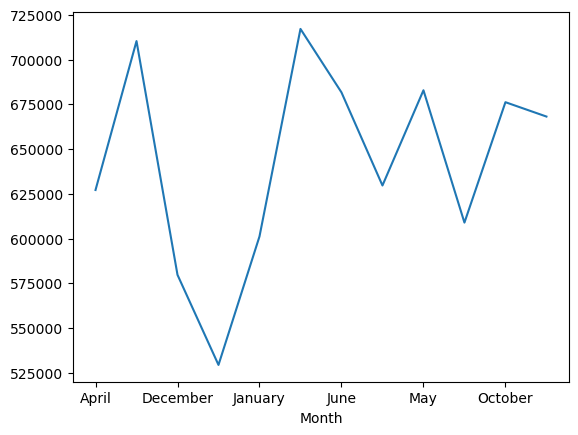

In [45]:
ax = months_df.groupby("Month").size().plot()

In [46]:
df_crime_by_months = months_df.groupby('Primary Type')['Month'].value_counts()

In [47]:
df_crime_by_months = df_crime_by_months.to_frame("# of Crimes")

In [48]:
plot_df = df_crime_by_months.reset_index()

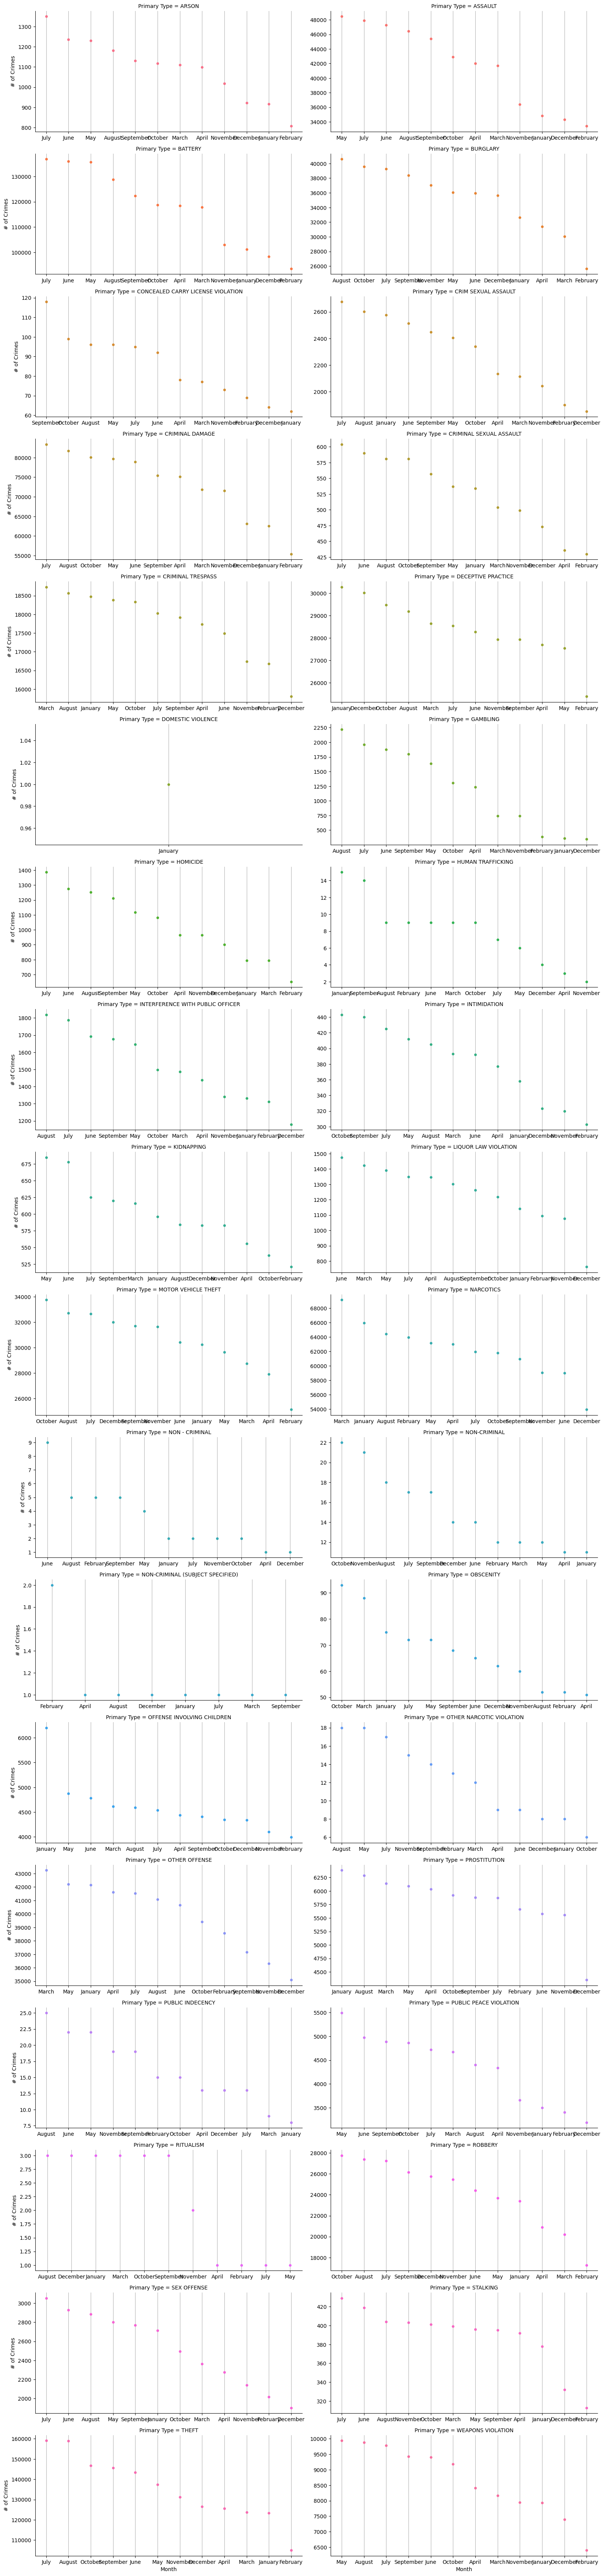

In [54]:
crime_plot = sns.catplot(data=plot_df, x='Month', y='# of Crimes',
                aspect=2, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in crime_plot.axes];

There are many individual crimes (identified by 'Primary Type') that do not follow the pattern of all crimes put together over the course of the months in a year. Many of the individual crime plots above show that the lowest number of crimes are committed in February or Winter in general, while the highest number of crimes are committed at various months of the year.